<BR>
<BR>
<BR>
<BR>
<BR>
   
                                          
                                          
                                          
                                          
                                          
#                                       One Support Vector Machine Model in Predicting Obesity Risk




##                                                        Gladys Murage

##                              College of Business, Engineering, and  Technology, National University

##                                         DDS8555 v1: PREDICTIVE ANALYSIS(3602869492)

##                                                        Dr MOHAMED NABEEL

##                                                            April 06, 2025


<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

SVM Accuracy: 0.8742774566473989
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.93      0.92       524
      Normal_Weight       0.85      0.81      0.83       626
     Obesity_Type_I       0.86      0.85      0.85       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.70      0.73      0.71       484
Overweight_Level_II       0.75      0.74      0.74       514

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



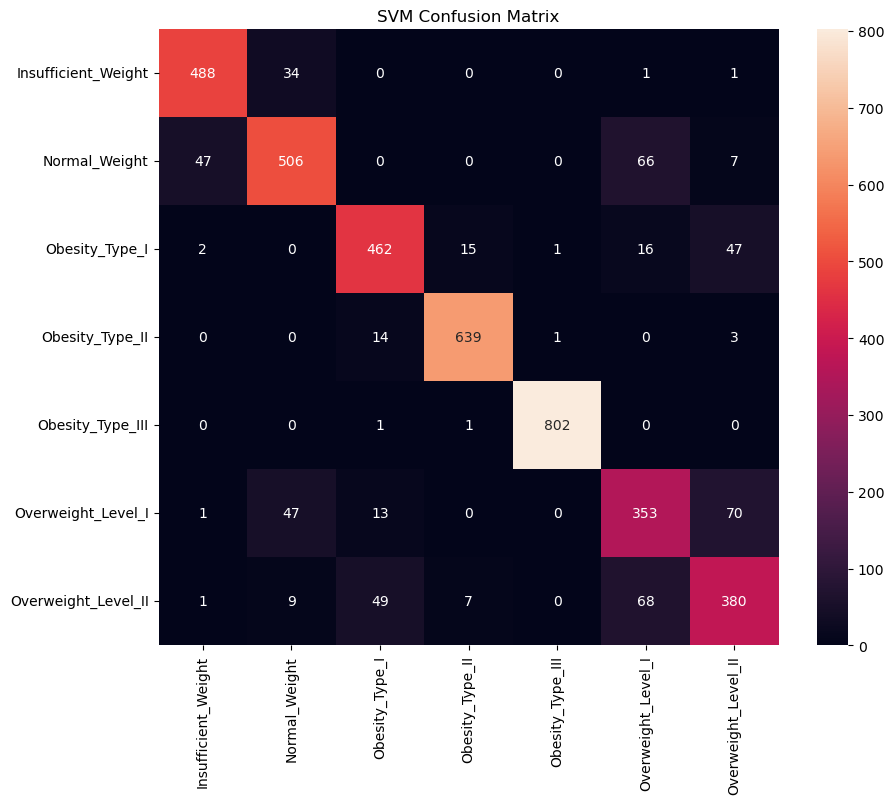

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('Otrain.csv')
test = pd.read_csv('Otest.csv')
sample_sub = pd.read_csv('Osample_submission.csv')

# Prepare features and target
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.copy()  # Assuming test doesn't have target column

# Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train/Validation Split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Create pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train SVM
svm_pipeline.fit(X_train_split, y_train_split)

# Predict on validation set
val_preds = svm_pipeline.predict(X_val)
val_preds_labels = le.inverse_transform(val_preds)

# Evaluation
print("SVM Accuracy:", accuracy_score(le.inverse_transform(y_val), val_preds_labels))
print(classification_report(le.inverse_transform(y_val), val_preds_labels))

# Confusion matrix
cm = confusion_matrix(le.inverse_transform(y_val), val_preds_labels, labels=le.classes_)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.savefig('SVM_Confusion_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate predictions on test set
test_preds = svm_pipeline.predict(X_test)
test_preds_labels = le.inverse_transform(test_preds)

# Save submission
submission = sample_sub.copy()
submission['NObeyesdad'] = test_preds_labels
submission.to_csv('SVM_submission.csv', index=False)


# 1. Key Metrics:
#### Accuracy (0.87 or 87%):
This represents the overall proportion of correctly predicted samples out of all samples tested (4,152 total). The SVM model got 87% of the predictions right.

#### Precision:
Precision measures the proportion of true positive predictions out of all predicted positives for a class.
Example: for "Insufficient_Weight," precision is 0.91, meaning 91% of the times the model predicted this category, it was correct.

#### Recall:
Recall is the proportion of actual positives for a class that the model correctly identified.
Example: for "Insufficient_Weight," recall is 0.93, meaning the model correctly identified 93% of all true instances in this class.

#### F1-Score:
F1-score balances precision and recall. It is the harmonic mean and a good metric to gauge overall performance per class.
Example: for "Insufficient_Weight," the F1-score is 0.92, showing strong performance.

#### Support:
Support is the number of true instances of each class in the test set. Example: "Insufficient_Weight" has 524 actual cases.

# 2. Class-Specific Performance:
#### Insufficient_Weight:
Precision: 91%, Recall: 93%, F1-Score: 92%
The model does very well in identifying this category.

#### Normal_Weight:
Precision: 85%, Recall: 81%, F1-Score: 83%
The model is less accurate for this category, with a slight drop in recall, the model missed some cases.

#### Obesity_Type_I & II:
Both classes show high F1-scores of 85% and 97%, respectively, indicating strong but slightly varying performance.

#### Obesity_Type_III:
Perfect scores of 100% precision, recall, and F1. The model is exceptionally accurate here, with zero misclassifications.

#### Overweight_Level_I & II:
These categories have lower scores, particularly F1-scores of 71% and 74%, indicating some struggle in distinguishing these classes compared to others.

#### Macro Avg vs Weighted Avg:
Macro Avg: an unweighted average of all classes. Here, 0.86 across precision, recall, and F1-score indicates good overall balance but it does not  consider support  which is the number of instances per class.

#### Weighted Avg: 
A support-weighted average at 0.87, reflects the impact of high-performing classes e.g., "Obesity_Type_III" on overall performance.

# 3. Observations:
a, The SVM model performs well overall, but it struggles slightly with the "Overweight_Level" categories.

b. The perfect scores for "Obesity_Type_III" suggest some data imbalance or an easier-to-classify category.

c, Further tuning or adding more representative data for lower-performing classes could improve overall metrics.

# 4. Conclusion
SVM performs consistently well, especially for the extreme categories namely Insufficient_Weight and Obesity_Type_III.

There is still room for improvement in Overweight categories, likely due to overlapping features with Normal/Obese groups.

This model is a strong candidate for deployment or submission.